In [1]:
# HIDDEN
import warnings
warnings.filterwarnings("ignore")

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

from itertools import product

In [2]:
# HIDDEN 
die = np.arange(1, 7, 1)

five_rolls = list(product(die, repeat=5))

five_rolls_probs = (1/6**5)**np.ones(6**5)

five_rolls_space = Table().with_columns(
   'omega', five_rolls,
    'P(omega)', five_rolls_probs
)

five_rolls_sum = five_rolls_space.with_columns(
    'S(omega)', five_rolls_space.apply(sum, 'omega')
).move_to_end('P(omega)')

## Distributions ##

Our space is the outcomes of five rolls of a die, and our random variable $S$ is the total number of spots on the five rolls.

In [3]:
five_rolls_sum

omega,S(omega),P(omega)
[1 1 1 1 1],5,0.000128601
[1 1 1 1 2],6,0.000128601
[1 1 1 1 3],7,0.000128601
[1 1 1 1 4],8,0.000128601
[1 1 1 1 5],9,0.000128601
[1 1 1 1 6],10,0.000128601
[1 1 1 2 1],6,0.000128601
[1 1 1 2 2],7,0.000128601
[1 1 1 2 3],8,0.000128601
[1 1 1 2 4],9,0.000128601


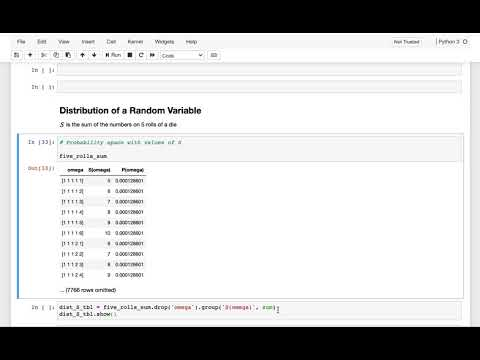

In [4]:
# VIDEO: Distribution of a Random Variable
from IPython.display import YouTubeVideo

YouTubeVideo("7ZznCAYa48Q")

In the last section we found $P(S = 10)$. We could use that same process to find $P(S = s)$ for each possible value of $s$. The `group` method allows us to do this for all $s$ at the same time.

To do this, we will start by dropping the `omega` column. Then we will `group` the table by the distinct values of `S(omega)`, and use `sum` to add up all the probabilities in each group.

In [5]:
dist_S = five_rolls_sum.drop('omega').group('S(omega)', sum)
dist_S

S(omega),P(omega) sum
5,0.000128601
6,0.000643004
7,0.00192901
8,0.00450103
9,0.00900206
10,0.0162037
11,0.0263632
12,0.0392233
13,0.0540123
14,0.0694444


This table shows all the possible values of $S$ along with all their probabilities. It is called a *probability distribution table* for $S$. 

The contents of the table — all the possible values of the random variable, along with all their probabilities — are called the *probability distribution of $S$*, or just *distribution of $S$* for short. The distribution shows how the total probability of 100% is distributed over all the possible values of $S$.

Let's check this, to make sure that all the $\omega$'s in the outcome space have been accounted for in the column of probabilities.

In [6]:
dist_S.column(1).sum()

0.99999999999999911

That's 1 in a computing environment. This is a feature of any probability distribution:

**Probabilities in a distribution are non-negative and sum to 1**.

```{admonition} Quick Check
A random variable $Y$ has the distribution given below, for some constant $c$. Find $c$.

|$y$| 1 | 2 | 3 |
|---:|:---:|:---:|:---:|
|$P(Y=y)$|$c$|$3c$|$c$|

```

```{admonition} Answer
:class: dropdown
$1/5$

```

### Probability Histogram ###
In Data 8 you used the `datascience` library to work with distributions of data. The `prob140` library builds on `datascience` to provide some convenient tools for working with probability distributions and events. It is largely a library for the display of tables and graphs.

First, we will construct a probability distribution object which, while it looks very much like the table above, expects a probability distribution in the second column and complains if it finds anything else.

To keep the code easily readable, let's extract the possible values and probabilities separately as arrays:

In [7]:
s = dist_S.column(0)
p_s = dist_S.column(1)

To turn these into a probability distribution object, start with an empty table and use the `values` and `probabilities` Table methods. The argument of `values` is a list or an array of possible values, and the argument of `probabilities` is a list or an array of the corresponding probabilities. 

In [8]:
dist_S = Table().values(s).probabilities(p_s)
dist_S

Value,Probability
5,0.000128601
6,0.000643004
7,0.00192901
8,0.00450103
9,0.00900206
10,0.0162037
11,0.0263632
12,0.0392233
13,0.0540123
14,0.0694444


That looks exactly like the table we had before except that it has more readable column labels. But now for the benefit: to visualize the distribution in a histogram, just use the `prob140` method `Plot` as follows. The resulting histogram is called the *probability histogram* of $S$.

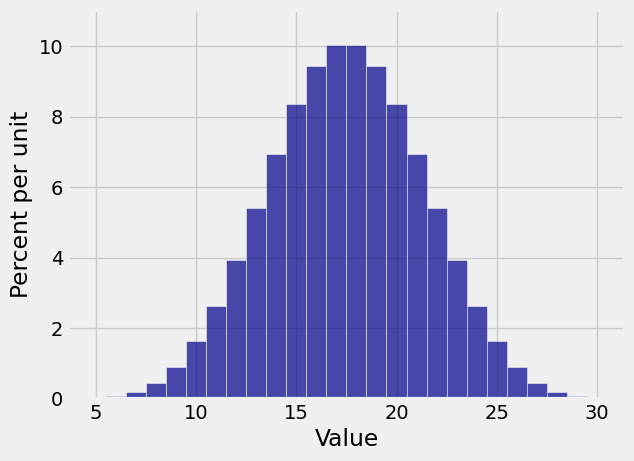

In [9]:
Plot(dist_S)

**Notes on `Plot`**

- Recall that `hist` in the `datascience` library displays a histogram of raw data contained in a column of a table. `Plot` in the `prob140` library displays a probability histogram based on a probability distribution as the input.

- `Plot` only works on probability distribution objects created using the `values` and `probabilities` methods. It won't work on a general member of the `Table` class.

- `Plot` works well with random variables that have integer values. Many of the random variables you will encounter in the next few chapters will be integer-valued. For displaying the distributions of other random variables, binning decisions are more complicated.

**Notes on the Distribution of $S$**

Here we have the bell shaped curve appearing as the distribution of the sum of five rolls of a die. Notice two differences between this histogram and the bell shaped distributions you saw in Data 8.
- This one displays an exact distribution. It was computed based on *all* the possible outcomes of the experiment. It is not an approximation nor an empirical histogram.
- The statement of the Central Limit Theorem in Data 8 said that the distribution of the sum of a *large* random sample is roughly normal. But here you're seeing a bell shaped distribution for the sum of only five rolls. If you start out with a uniform distribution (which is the distribution of a single roll), then you don't need a large sample before the probability distribution of the sum starts to look normal.

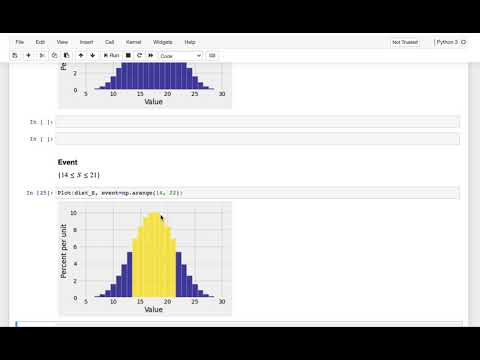

In [10]:
# VIDEO: Probability Histogram
#from IPython.display import YouTubeVideo

YouTubeVideo("jOLQGfccbhs")

### Visualizing Probabilities of Events ###
As you know from Data 8, the interval between the points of inflection of the bell curve contains about 68% of the area of the curve. Though the histogram above isn't exactly a bell curve – it is a discrete histogram with only 26 bars – it's pretty close. If you imagine a smoothe curve over it, the points of inflection appear to be at 14 and 21, roughly.

The `event` argument of `Plot` lets you visualize the probability of the event, as follows.

In [11]:
Plot(dist_S, event = np.arange(14, 22, 1))

AttributeError: module 'collections' has no attribute 'Iterable'

The gold area is the equal to $P(14 \le S \le 21)$.

The `event` method takes one argument specifying the event. It displays the rows of the distribution table corresponding to `event` and also the probability of the event.

To find $P(14 \le S \le 21)$, use `event` as follows.

In [9]:
dist_S.event(np.arange(14, 22, 1))

P(Event) = 0.6959876543209863


Outcome,Probability
14,0.0694444
15,0.0837191
16,0.0945216
17,0.100309
18,0.100309
19,0.0945216
20,0.0837191
21,0.0694444


The chance is 69.6%, not very far from our estimate of around 68%.

To find the numerical value of the probability without displaying all the outcomes in the event, use `event` as above and put a semi-colon at the end of the line. This suppresses the table display.

In [11]:
dist_S.event(np.arange(14, 22, 1));

P(Event) = 0.6959876543209863


In [3]:
# VIDEO: Notation and Calculation
#from IPython.display import YouTubeVideo

YouTubeVideo("QiTc-HKnlFc")

### Math and Code Correspondence ###
$P(14 \le S \le 21)$ can be found by partitioning the event $\{ 14 \le S \le 21 \}$ as the union of the mutually exclusive events $\{S = s\}$ for $14 \le s \le 21$, and then using the addition rule.

$$
\{14 \le S \le 21\} ~ = ~ \bigcup_{s = 14}^{21} \{S = s \}, ~~~ \text{ so } ~~~
P(14 \le S \le 21) ~ = ~ \sum_{s = 14}^{21} P(S = s)
$$

Note carefully the use of lower case $s$ for the generic possible value, in contrast with upper case $S$ for the random variable. Not doing so leads to endless confusion about what the formulas mean.

This one means:
- First extract the event $\{ S = s\}$ for each value $s$ in the range 14 through 21:

In [26]:
event_table = dist_S.where(0, are.between(14, 22))
event_table

Value,Probability
14,0.0694444
15,0.0837191
16,0.0945216
17,0.100309
18,0.100309
19,0.0945216
20,0.0837191
21,0.0694444


- Then add the probabilities of all those events:

In [27]:
event_table.column('Probability').sum()

0.6959876543209863

The `event` method does all this in one step. Here it is again, for comparison.

In [28]:
dist_S.event(np.arange(14, 22, 1))

P(Event) = 0.6959876543209863


Outcome,Probability
14,0.0694444
15,0.0837191
16,0.0945216
17,0.100309
18,0.100309
19,0.0945216
20,0.0837191
21,0.0694444


You can use the same basic method in various ways to find the probability of any event determined by $S$. Here are two examples.

**Example 1.**

$$
P(S^2 = 400) = P(S = 20) = 8.37\%
$$

from the table above.

**Example 2.**

$$
P(S \ge 20) = \sum_{s=20}^{30} P(S = s)
$$

In [12]:
dist_S.event(np.arange(20, 31, 1));

P(Event) = 0.30516975308642047


**Example 3.**
Remember the math fact that for numbers $x$, $a$, and $b > 0$, saying that $\vert x - a \vert \le b$ is the same as saying that $x$ is in the range $a \pm b$.

$$
P(\big{\vert} S - 10 \big{|} \le 6) ~ = ~ P(4 \le S \le 16) ~ = ~ \sum_{s=4}^{16} P(S=s)
$$

In [13]:
dist_S.event(np.arange(4, 17, 1));

P(Event) = 0.3996913580246917


### Named Distributions ###
Some distributions are used so often that they have special names. Usually they also have *parameters*, which are constants associated with the distribution.

**Bernoulli $(p)$:** This is the distribution of a Boolean random variable, that is, a random variable that has possible values $0$ and $1$. The parameter $p$ is the chance of $1$, as in the distribution table below.

|value|$0$|$1$|
|---:|:---:|:---:|
**probability**|$1-p$|$p$|

Examples of random variables that have this distribution:

- The number of heads in one toss of a coin that lands heads with chance $p$
- The *indicator* of an event that has chance $p$, that is, a random variable that has value $1$ if the event occurs and $0$ otherwise.

The distribution is named after [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli), the Swiss mathematician who discovered the constant $e$ and wrote the book [Ars Conjectandi](https://en.wikipedia.org/wiki/Ars_Conjectandi) (The Art of Conjecturing) on combinatorics and probability in which he analyzed "success-failure" or $\text{1/0}$ trials.

**Uniform** on a finite set: This is the distribution that makes all elements of the set of outcomes equally likely. 
For example, the number of spots on one roll of a die has the uniform distribution on $\{ 1, 2, 3, 4, 5, 6 \}$.